# Model Training

## 1.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import warnings

In [2]:
from catboost import CatBoostRegressor

ModuleNotFoundError: No module named 'catboost'

## Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv("./data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math score'])

In [6]:
y = df['math score']

In [7]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
one_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', one_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [ ]:
### Evaluation Functions

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    #"CatBoosting Regressor": CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Model predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    #Model evaluation 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Training performance")
    print(f"Mean abosolute error: {model_train_mae:.4f}")
    print(f"Root Mean Square error: {model_train_rmse:.4f}")
    print(f"R2 Score: {model_train_r2}")
    
    print("-"*40)

    print("Model Test performance")
    print(f"Mean abosolute error: {model_test_mae:.4f}")
    print(f"Root Mean Square error: {model_test_rmse:.4f}")
    print(f"R2 Score: {model_test_r2}")

    r2_list.append(model_test_r2)

    print("="*40)
    print("\n")



Linear Regression
Model Training performance
Mean abosolute error: 4.2667
Root Mean Square error: 5.3231
R2 Score: 0.8743172040139593
----------------------------------------
Model Test performance
Mean abosolute error: 4.2148
Root Mean Square error: 5.3940
R2 Score: 0.8804332983749564


Lasso
Model Training performance
Mean abosolute error: 5.2063
Root Mean Square error: 6.5938
R2 Score: 0.8071462015863458
----------------------------------------
Model Test performance
Mean abosolute error: 5.1579
Root Mean Square error: 6.5197
R2 Score: 0.8253197323627852


Ridge
Model Training performance
Mean abosolute error: 4.2650
Root Mean Square error: 5.3233
R2 Score: 0.8743042615212909
----------------------------------------
Model Test performance
Mean abosolute error: 4.2111
Root Mean Square error: 5.3904
R2 Score: 0.8805931485028737


K-Neighbors Regressor
Model Training performance
Mean abosolute error: 4.5175
Root Mean Square error: 5.7091
R2 Score: 0.8554279731066252
-------------------

## Results

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Modle Name', "R2 Score"]).sort_values(by=('R2 Score'), ascending=False)

,Modle Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854338
7,AdaBoost Regressor,0.847364
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.743772


#### Note

Based on these results the model that would be used will be a ridge model as it has the best R2 Score

## Ridge Model

In [28]:
ridge_model = Ridge(fit_intercept=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)*100
print(f" The accuracy of the model is {accuracy:.2f}")

 The accuracy of the model is 88.06


## Ploting the prediction

Text(0.5, 1.0, 'Predictions against Actual Values')

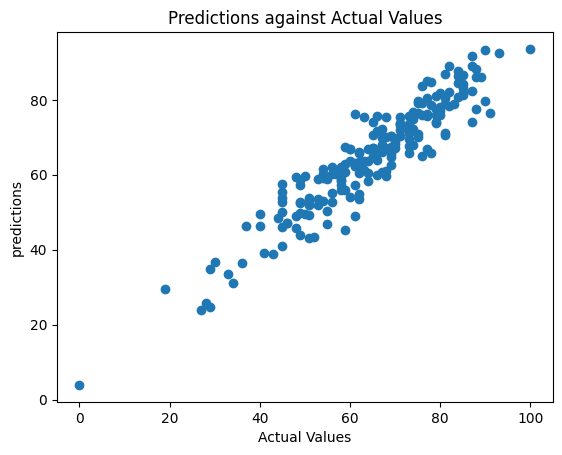

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("predictions")
plt.title("Predictions against Actual Values")

## Diffrence between Prediction and Actual Values

In [32]:
pred_df = pd.DataFrame({
    "Actual Value": y_test,
    "Predictions": y_pred,
    "Diffrence": np.abs(y_test-y_pred)
}).sort_values(by=("Diffrence"), ascending=False)
pred_df

,Actual Value,Predictions,Diffrence
158,61,76.278622,15.278622
521,91,76.398705,14.601295
265,59,45.167633,13.832367
859,87,74.115900,12.884100
371,45,57.456655,12.456655
...,...,...,...
543,82,82.213256,0.213256
332,62,62.170763,0.170763
259,65,64.906249,0.093751
351,66,65.929925,0.070075
